<a href="https://colab.research.google.com/github/nathalieveronika/extreme_value_theory/blob/master/Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from google.colab import files
import pandas as pd 

# Analysis of Daily Precipitation heights 

Data downloaded from https://cdc.dwd.de/portal/201912031600/mapview 

Precipitation hights are given in mm and were measured in Berlin Dahlem at the FU

## First steps

Importing data from csv file

In [0]:
df=pd.read_csv('drive/My Drive/Bachelor Arbeit OLD/Application/cdc_download_2020-01-18_11_55/data/data_RS_MN006.csv')
original_df = df
filepath = '/content/drive/My Drive/Bachelor Arbeit OLD/Plots/'

In [6]:
print(df)

      Produkt_Code  SDO_ID  Zeitstempel  Wert  Qualitaet_Niveau  Qualitaet_Byte
0         RS_MN006     403     19500101   2.2                 5               0
1         RS_MN006     403     19500102  12.6                 5               0
2         RS_MN006     403     19500103   0.5                 5               0
3         RS_MN006     403     19500104   0.5                 5               0
4         RS_MN006     403     19500105  10.3                 5               0
...            ...     ...          ...   ...               ...             ...
25578     RS_MN006     403     20200113   0.0                 0               1
25579     RS_MN006     403     20200114   0.0                 0               1
25580     RS_MN006     403     20200115   0.0                 0               1
25581     RS_MN006     403     20200116   0.0                 0               1
25582     RS_MN006     403     20200117   0.1                 0               1

[25583 rows x 6 columns]


Plot daily rainfall accumulations:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


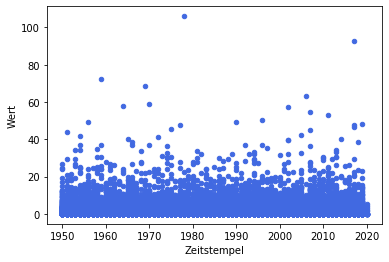

In [67]:
import matplotlib.pyplot as plt

n = len(df)
for i in range(n): 
  df["Zeitstempel"][i] = int(str(original_df['Zeitstempel'][i])[:4])
df.plot(kind='scatter',x='Zeitstempel',y='Wert',color="royalblue")
plt.savefig(filepath+"rainfall_accumulations.png", bbox_inches = 'tight')


Sensible to convert panda dataframe into numpy array:

In [8]:
n = len(df)
data = pd.DataFrame(df).to_numpy()
for i in range(n):
  data[i][2] = int(str(data[i][2])[:4])
print(data)


[['RS_MN006' 403 1950 2.2 5 0]
 ['RS_MN006' 403 1950 12.6 5 0]
 ['RS_MN006' 403 1950 0.5 5 0]
 ...
 ['RS_MN006' 403 2020 0.0 0 1]
 ['RS_MN006' 403 2020 0.0 0 1]
 ['RS_MN006' 403 2020 0.1 0 1]]


And an array with only *mm* is needed:

In [18]:
mm = []
for i in range(n):
  mm.append(data[i][3])
print(mm)

[2.2, 12.6, 0.5, 0.5, 10.3, 7.2, 0.4, 0.0, 3.7, 4.5, 0.6, 7.1, 0.0, 0.0, 3.8, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.7, 0.0, 0.0, 0.3, 1.0, 0.1, 0.0, 5.7, 0.1, 17.3, 0.2, 1.3, 0.0, 1.1, 6.4, 0.1, 0.0, 0.0, 0.0, 7.2, 5.3, 0.0, 0.0, 1.2, 6.5, 10.7, 1.8, 0.0, 0.0, 0.0, 0.0, 4.3, 0.0, 0.0, 0.0, 0.0, 4.9, 0.3, 2.1, 4.3, 2.7, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 1.0, 2.8, 0.0, 0.5, 11.7, 1.9, 0.0, 0.0, 0.4, 3.9, 1.0, 4.0, 12.2, 0.0, 24.6, 0.0, 0.0, 0.0, 0.0, 1.6, 3.0, 0.0, 7.0, 0.1, 0.2, 0.0, 0.4, 4.6, 1.9, 0.0, 0.0, 0.2, 1.1, 0.0, 12.3, 5.2, 3.8, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 0.0, 2.4, 19.5, 0.0, 3.5, 2.8, 3.4, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.6, 0.0, 0.0, 0.0, 4.6, 0.4, 0.0, 0.0, 0.0, 0.0, 0.1, 3.3, 6.7, 2.3, 7.8, 0.0, 0.3, 1.2, 11.8, 8.9, 0.1, 0.0, 0.0, 0.0, 0.9, 0.0, 11.0, 0.9, 0.0, 0.0, 0.0, 0.0, 26.5, 0.1, 0.0, 4.5, 24.1, 0.0, 0

## Threshold Selection


Use **mean residual life plot $e(u)$** to find appropriate threshold $u$!

Mean excess function of a GPD is linear, hence construct *empirical mean excess function $e_{n}(u)$* as a sample version of the mean excess function $e(u)$. Then check for a $u$-region where the graph of $e_{n}(u)$ becomes roughly linear. For such $u$ an approximation of $F_{u}$ by a GPD seems reasonable [Embrechts].

Empirical cdf of the rain data (= "Wert" column = mm) for some thrshold $u$

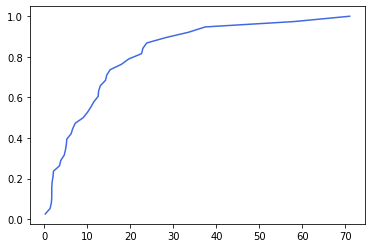

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

u = 35 #threshold 
ecdf = ECDF(np.asarray(mm)[np.asarray(mm)>=u])
plt.plot(ecdf.x-u, ecdf.y,color="royalblue")

Mean residual life plot:

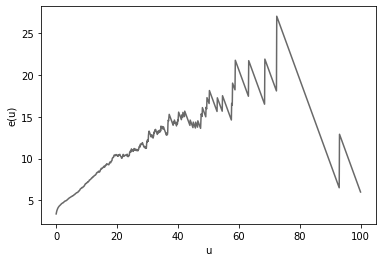

In [11]:
# functioin to count exceedances, remember them and take the empirical mean res
# excess function 
def y_value(threshold,my_set):
  count = 0
  exceedances = []
  summe = 0
  for i in my_set : 
    if i > threshold : 
        count = count + 1
        exceedances.append(i)
  for j in exceedances : 
    summe = summe+(j-threshold)
  summe=summe/count
  return(summe)

u = np.linspace(0,100,1000)
y = []
for i in u:
  y.append(y_value(i,mm))
#plt.title('Mean residual life plot for daily rainfall data')
plt.xlabel('u')
plt.ylabel('e(u)')
plt.plot(u,y,color="dimgrey")

plt.savefig(filepath+"meanresidual_rain.png", bbox_inches = 'tight')


number of exceedances over threshold:

In [12]:
len(mm)

25583

## Maximum Likelihood estimation

Not analytically solvable but R provideds easy solution to calculate estimators numerically:


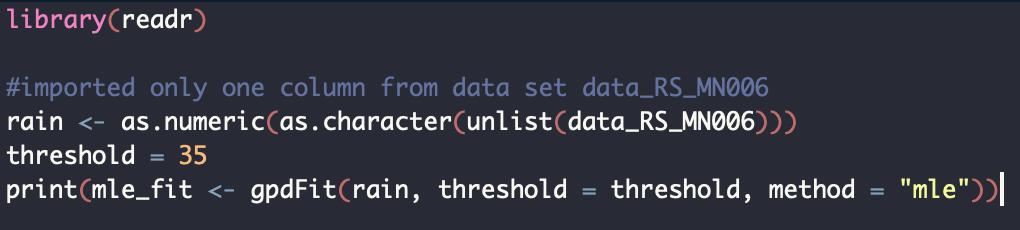

Output:

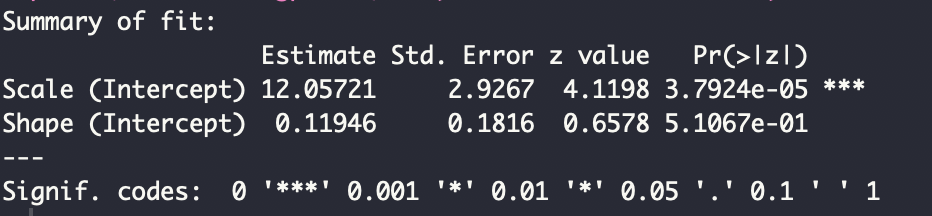

i.e. for $u=35$, $\hat{\xi} \thickapprox 12.06$ and $\hat{\sigma} \thickapprox 0.12$

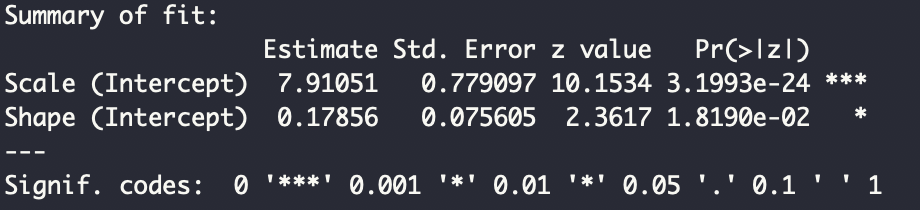

and for $u=18$, $\hat{\xi} \thickapprox 7.91$ and $\hat{\sigma} \thickapprox 0.18$

## Model diagnostics

####Probability plot

Let $x_{(1)}\leq x_{(2)}\leq...\leq x_{(n)}$ be an ordered sample of independent observations from a population and let $\tilde{F}$ be the estimated distribution function. Then the corresponding probability plot contains all points in $\left\{ \left(\tilde{F}\left(x_{(i)}\right),\frac{i}{n+1}\right):i=1,...,n\right\}$ .


empirical distribution function together with generalized Pareto distribution for $\xi=0.23$ and $\sigma = 4.37$

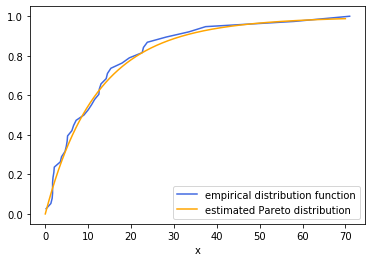

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import genpareto

f = plt.figure()
plt.xlabel("x")

mle_xi = 0.12
mle_sigma = 12.06
u = 35
ecdf = ECDF(np.asarray(mm)[np.asarray(mm)>u])

plt.plot(ecdf.x-u, ecdf.y,label="empirical distribution function",color="royalblue")

x = np.linspace(0,70,100000)
plt.plot(x,genpareto.cdf(x, c=mle_xi,scale=mle_sigma),
         label="estimated Pareto distribution",color="orange")
plt.legend()
plt.savefig(filepath+"directcomparision_df_rain.png", bbox_inches = 'tight')


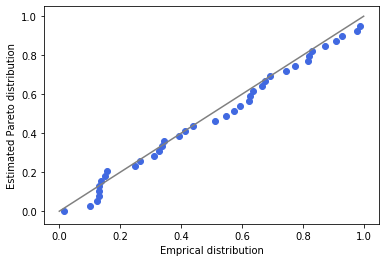

In [64]:
empiricalcdf = []
#for i in range(len(mm[mm>u])):
for i in range(len(np.asarray(mm)[np.asarray(mm)>u])):
  #empiricalcdf.append(i/(len(mm[mm>u])+1))
  empiricalcdf.append(i/(len(np.asarray(mm)[np.asarray(mm)>u])+1))

f = plt.figure()

sort = (np.sort(np.asarray(mm)[np.asarray(mm)>u]))-u
plt.xlabel('Emprical distribution')
plt.ylabel('Estimated Pareto distribution')

plt.scatter(genpareto.cdf(sort, c=mle_xi,scale=mle_sigma),empiricalcdf,color="royalblue") 

x = np.linspace(0,1,1000)
plt.plot(x,x,color="grey")

plt.savefig(filepath+"pp_plot_rain.png", bbox_inches = 'tight')



####Quantile plot


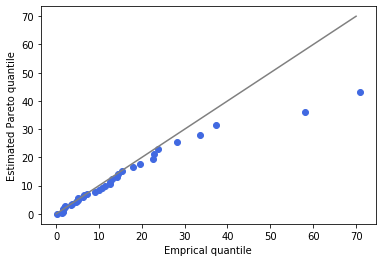

In [63]:
plt.scatter(sort, genpareto.ppf(empiricalcdf, c=mle_xi,scale=mle_sigma),color="royalblue") 

plt.xlabel('Emprical quantile')
plt.ylabel('Estimated Pareto quantile')

y = np.linspace(0,70,1000)
plt.plot(y,y,color="grey")

plt.savefig(filepath+"qq_plot_rain.png", bbox_inches = 'tight')


Compare fitted generalized Pareto model to a histogram of the threshold excceedances:

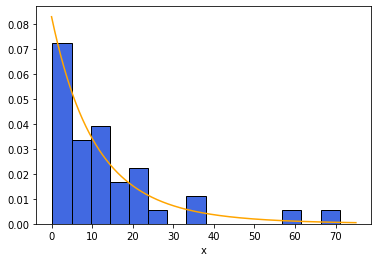

In [62]:
exceedances = []
for i in mm:
  if i > u :
    exceedances.append(i-u)

f = plt.figure()
plt.xlabel("x")
x = np.linspace(0,75,1000)
plt.hist(exceedances,bins=15, density="True",histtype='bar',ec="black",color="royalblue")
plt.plot(x,genpareto.pdf(x,c=mle_xi,scale=mle_sigma),color="orange")
plt.savefig(filepath+"histogram_rain.png", bbox_inches = 'tight')
plt.show()



With different threshold

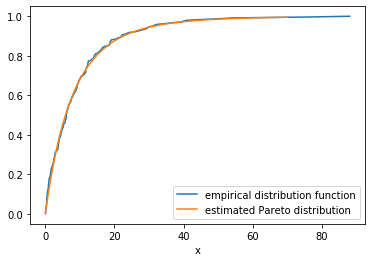

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import genpareto

f = plt.figure()
plt.xlabel("x")

mle_xi = 0.18
mle_sigma = 7.91
u2 = 18
ecdf = ECDF(np.asarray(mm)[np.asarray(mm)>u2])

plt.plot(ecdf.x-u2, ecdf.y,label="empirical distribution function")

x = np.linspace(0,70,100000)
plt.plot(x,genpareto.cdf(x, c=mle_xi,scale=mle_sigma),
         label="estimated Pareto distribution")
plt.legend()


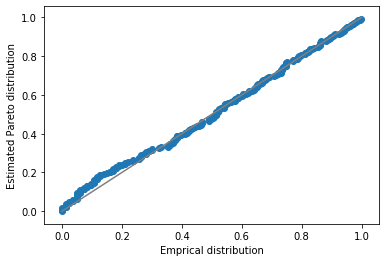

In [36]:
empiricalcdf2 = []
for i in range(len(np.asarray(mm)[np.asarray(mm)>=u2])):
  empiricalcdf2.append(i/(len(np.asarray(mm)[np.asarray(mm)>=u2])+1))

f = plt.figure()

sort2 = (np.sort(np.asarray(mm)[np.asarray(mm)>=u2]))-u2
plt.xlabel('Emprical distribution')
plt.ylabel('Estimated Pareto distribution')

plt.scatter(genpareto.cdf(sort2, c=mle_xi,scale=mle_sigma),empiricalcdf2) 

x = np.linspace(0,1,1000)
plt.plot(x,x,color="grey")



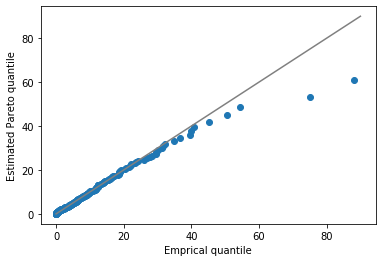

In [37]:
plt.scatter(sort2, genpareto.ppf(empiricalcdf2, c=mle_xi,scale=mle_sigma)) 

plt.xlabel('Emprical quantile')
plt.ylabel('Estimated Pareto quantile')

y = np.linspace(0,90,1000)
plt.plot(y,y,color="grey")



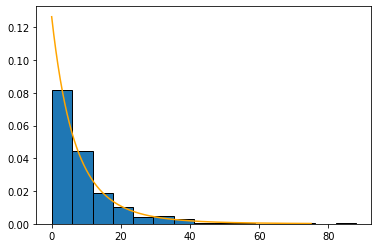

In [38]:
exceedances = []
for i in mm:
  if i > u2 :
    exceedances.append(i-u2)

x = np.linspace(0,75,1000)
plt.hist(exceedances,bins=15, density="True",histtype='bar',ec="black")
plt.plot(x,genpareto.pdf(x,c=mle_xi,scale=mle_sigma),color="orange")
plt.show()



### Space for some testing:

In [0]:
#Some testing

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto

from statsmodels.distributions.empirical_distribution import ECDF

u = 0.998
s = 1 - u

sample = np.random.uniform(0,1,size=1000000)
print(type(sample))